In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
data = "ca_data_jul20-jul21.csv"

# Read Data File and store into Pandas DataFrames
covid_data = pd.read_csv(data)
covid_data.head()

,date,county,state,cases,deaths
0,2020-07-01,Alameda,California,6177,136.0
1,2020-07-01,Alpine,California,1,0.0
2,2020-07-01,Amador,California,22,0.0
3,2020-07-01,Butte,California,189,2.0
4,2020-07-01,Calaveras,California,40,0.0


In [2]:
# Create a dataframe which has the ending numbers of cases and deaths in our selected period which is grouped according to county
end = covid_data.groupby('county').max()
end.head()


,date,state,cases,deaths
county,,,,
Alameda,2021-06-30,California,90297,1693.0
Alpine,2021-06-30,California,89,0.0
Amador,2021-06-30,California,3753,47.0
Butte,2021-06-30,California,12697,201.0
Calaveras,2021-06-30,California,2210,56.0


In [3]:
# Create a dataframe which has the beginning numbers of cases and deaths in our selected period which is grouped according to county
beginning = covid_data.groupby('county').min()
beginning.head()

,date,state,cases,deaths
county,,,,
Alameda,2020-07-01,California,6177,136.0
Alpine,2020-07-01,California,1,0.0
Amador,2020-07-01,California,22,0.0
Butte,2020-07-01,California,189,2.0
Calaveras,2020-07-01,California,40,0.0


In [4]:
# Creating two new columns which are calculating the numbers of cases and deaths just in our sellected period
end['cases in timeframe'] = end['cases'] - beginning['cases']
end['deaths in timeframe'] = end['deaths'] - beginning['deaths']
end.head()

,date,state,cases,deaths,cases in timeframe,deaths in timeframe
county,,,,,,
Alameda,2021-06-30,California,90297,1693.0,84120,1557.0
Alpine,2021-06-30,California,89,0.0,88,0.0
Amador,2021-06-30,California,3753,47.0,3731,47.0
Butte,2021-06-30,California,12697,201.0,12508,199.0
Calaveras,2021-06-30,California,2210,56.0,2170,56.0


In [5]:
# Finding the top 5 countries according to number of cases
top_counties_cases= end.nlargest(5, 'cases in timeframe')
top_counties_cases = top_counties_cases.drop(columns=['date', 'state','cases','deaths','deaths in timeframe'])
top_counties_cases


,cases in timeframe
county,
Los Angeles,1145401
San Bernardino,287017
Riverside,283143
San Diego,267876
Orange,259148


In [6]:
# Finding the top 5 countries according to number of deaths
top_counties_deaths = end.nlargest(5, 'deaths in timeframe')
top_counties_deaths = top_counties_deaths.drop(columns=['date', 'state','cases','deaths','cases in timeframe'])
top_counties_deaths

,deaths in timeframe
county,
Los Angeles,21096.0
Orange,4779.0
San Bernardino,4682.0
Riverside,4173.0
San Diego,3408.0


In [7]:
# Finding the bottom 5 countries according to number of cases
bottom_counties_cases = end.nsmallest(5, 'cases in timeframe')
bottom_counties_cases = bottom_counties_cases.drop(columns=['date', 'state','cases','deaths','deaths in timeframe'])
bottom_counties_cases

,cases in timeframe
county,
Sierra,58
Alpine,88
Trinity,339
Mariposa,440
Modoc,564


In [8]:
# Finding the bottom 5 countries according to number of deaths
bottom_counties_deaths = end.nsmallest(5, 'deaths in timeframe')
bottom_counties_deaths = bottom_counties_deaths.drop(columns=['date', 'state','cases','deaths','cases in timeframe'])
bottom_counties_deaths

,deaths in timeframe
county,
Alpine,0.0
Sierra,0.0
Mono,3.0
Modoc,5.0
Trinity,5.0


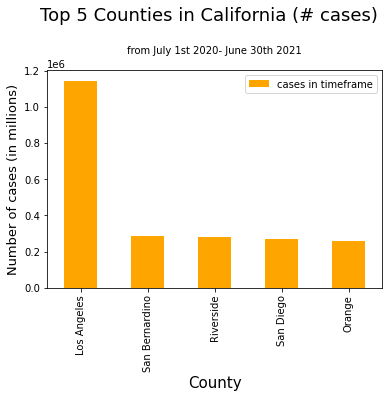

In [9]:
# Graphing Top 5 Counties in California according to number of cases in choosen period
plot = top_counties_cases.plot(kind = 'bar', color="orange")
plot.set_xlabel("County", fontsize=15)
plot.set_ylabel("Number of cases (in millions)",x=3, fontsize=13)
plt.suptitle("Top 5 Counties in California (# cases)",y=1.1, fontsize=18)
plt.title("from July 1st 2020- June 30th 2021", y=1.05, fontsize=10)
plt.savefig("./Images/top_counties_cases.png")

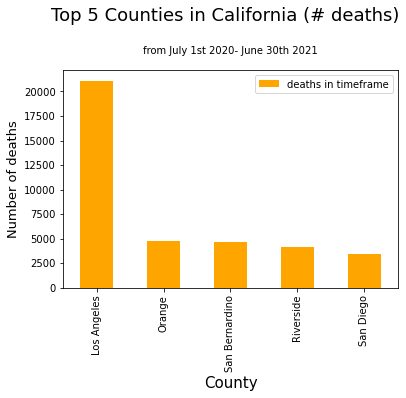

In [10]:
# Graphing Top 5 Counties in California according to number of deaths in choosen period
plot = top_counties_deaths.plot(kind = 'bar', color= 'orange')
plot.set_xlabel("County",fontsize = 15)
plot.set_ylabel("Number of deaths",x=3, fontsize=13)
plt.suptitle("Top 5 Counties in California (# deaths)",y=1.1, fontsize=18)
plt.title("from July 1st 2020- June 30th 2021", y=1.05, fontsize=10)
plt.savefig("./Images/top_counties_deaths.png")


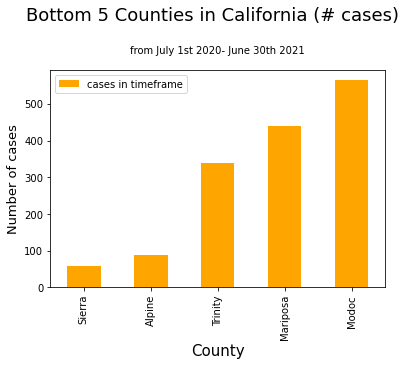

In [11]:
# Graphing Bottom 5 Counties in California according to number of cases in choosen period
plot = bottom_counties_cases.plot(kind = 'bar', color="orange")
plot.set_xlabel("County", fontsize=15)
plot.set_ylabel("Number of cases", x=3, fontsize = 13)
plt.suptitle("Bottom 5 Counties in California (# cases)", y = 1.1, fontsize = 18)
plt.title("from July 1st 2020- June 30th 2021", y=1.05, fontsize=10)
plt.savefig("./Images/bottom_counties_cases.png")

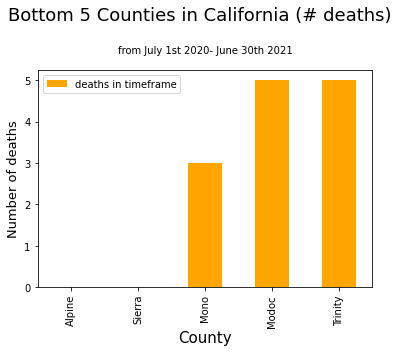

In [12]:
# Graphing Bottom 5 Counties in California according to number of deaths in choosen period
plot = bottom_counties_deaths.plot(kind = 'bar', color = 'orange')
plot.set_xlabel("County", fontsize = 15)
plot.set_ylabel("Number of deaths", x=3, fontsize = 13)
plt.suptitle("Bottom 5 Counties in California (# deaths)", y = 1.1, fontsize = 18)
plt.title("from July 1st 2020- June 30th 2021", y=1.05, fontsize=10)
plt.savefig("./Images/bottom_counties_deaths.png")